In [129]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from rasterstats import zonal_stats
import datashader
import xarray
import rioxarray
import rasterio
import contextily as ctx
pd.set_option('display.max_columns', None)

In [120]:
landslides=gpd.read_file('zonal_stat_recients.shp')
density=landslides['_sum']
density

0      0.913441
1      4.297241
2      5.750688
3      5.760023
4      5.615688
         ...   
616    0.000000
617    2.155954
618    2.119096
619    2.045465
620    2.110764
Name: _sum, Length: 621, dtype: float64

In [121]:
recien_random=gpd.read_file('zonal_stat_recients_rand.shp')
density_random=recien_random['_sum']
density_random

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
508    0.0
509    0.0
510    0.0
511    0.0
512    0.0
Name: _sum, Length: 513, dtype: float64

In [122]:
chi=gpd.read_file('zonal_stat_chi.shp')
chi_dif=chi['_range']
chi_dif

0      1.756656
1      0.398996
2      0.393626
3      0.393626
4      0.393626
         ...   
616    0.016446
617    0.295414
618    0.244249
619    0.244249
620    0.244249
Name: _range, Length: 621, dtype: float64

In [123]:
chi_random=gpd.read_file('zonal_stat_chi_random.shp')
chi_dif_random=chi_random['_range']
chi_dif_random

0      0.747222
1      1.259122
2      1.651946
3      0.000000
4      0.303993
         ...   
508    0.075840
509    0.353587
510    0.999547
511    0.381437
512    1.853935
Name: _range, Length: 513, dtype: float64

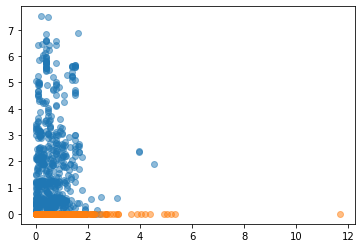

In [125]:
plt.scatter(chi_dif,density, alpha=0.5)
plt.scatter(chi_dif_random,density_random, alpha=0.5)


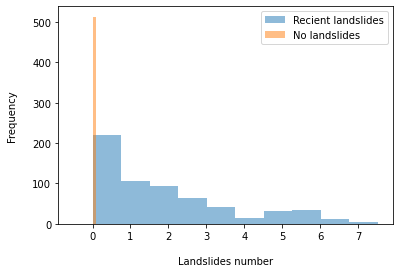

In [126]:
plt.hist(density, alpha=0.5,label='Recient landslides')
plt.hist(density_random, alpha=0.5,label='No landslides')
plt.ylabel('Frequency', labelpad=15)
plt.xlabel('Landslides number', labelpad=15)
plt.legend(loc='upper right')

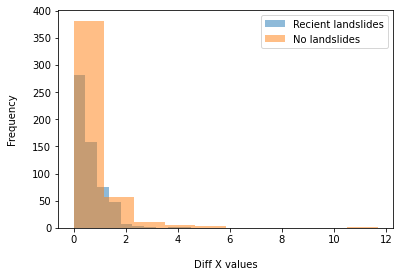

In [127]:
plt.hist(chi_dif, alpha=0.5,label='Recient landslides')
plt.hist(chi_dif_random, alpha=0.5,label='No landslides')
plt.ylabel('Frequency', labelpad=15)
plt.xlabel('Diff X values', labelpad=15)
plt.legend(loc='upper right')

<AxesSubplot:>

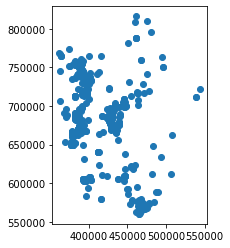

In [2]:
recients=gpd.read_file('recients.shp')
recients.plot()

In [137]:
cat=gpd.read_file('cuencas_con_indices_V4_topologia.shp')
cat.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   codigo      168 non-null    int64   
 1   HI          168 non-null    float64 
 2   _Consecuti  168 non-null    int64   
 3   _Nomb_Cuen  168 non-null    object  
 4   _Cod_szh    168 non-null    int64   
 5   _Melton     168 non-null    float64 
 6   _Rn         168 non-null    float64 
 7   _Rh         168 non-null    float64 
 8   _Lg         168 non-null    float64 
 9   _Ct         168 non-null    float64 
 10  _If         168 non-null    float64 
 11  _Di         168 non-null    float64 
 12  _C          168 non-null    float64 
 13  _Dd         168 non-null    float64 
 14  _Fs         168 non-null    float64 
 15  _Rw         168 non-null    float64 
 16  _Rf         168 non-null    float64 
 17  _Rt         168 non-null    float64 
 18  _Cc         168 non-null    float64 
 19  

<AxesSubplot:>

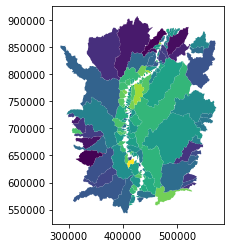

In [128]:
cat.plot(column='HI')

In [16]:
recients['x']=recients.geometry.x
recients['y']=recients.geometry.y
recients.head(2)

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,Fecha,geometry,x,y
0,Jan2018,None,None,None,None,None,-1,0,-1,None,None,01/2018,POINT Z (446930.432 699380.028 0.000),446930.432361,699380.028446
1,May2008,None,None,None,None,None,-1,0,-1,None,None,05/2008,POINT Z (428307.201 689824.340 0.000),428307.200795,689824.339911


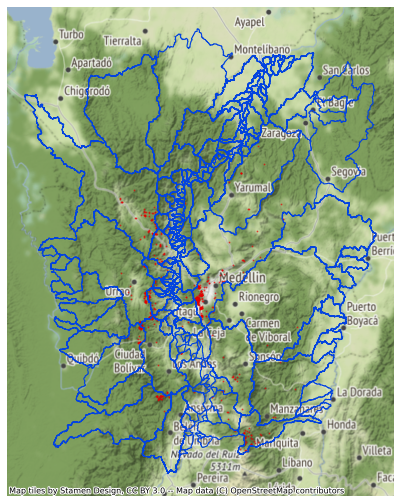

In [69]:
ax = recients.plot.scatter('x','y',s=1,c="xkcd:red",alpha=0.5,figsize=(9, 9))
cat.plot(ax=ax,facecolor="none", edgecolor="xkcd:blue")
ax.set_axis_off()
ctx.add_basemap(ax, crs="EPSG:32618")

In [131]:
join=gpd.sjoin(cat,recients,how='inner')
join.head(2)

,codigo,HI,_Consecuti,_Nomb_Cuen,_Cod_szh,_Melton,_Rn,_Rh,_Lg,_Ct,_If,_Di,_C,_Dd,_Fs,_Rw,_Rf,_Rt,_Cc,_Rc,_Re,_Ff,_ρ,_Rb,_Lur,_Cl,_Lu,_Nu,_Area_Km2,_Perime_Km,_ZH,_Asimetria,ValorTheta,ThetaReal,geometry,index_right,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,Fecha,x,y
18,262411,0.256776,44,cuenca_10,2624,0.201416,9.574030,0.043785,0.102308,13.826931,133.910272,5.606505,0.204616,4.887208,27.400156,0.755683,0.349147,13.507373,2.828571,0.126770,0.245296,0.047257,1.050529,1.872891,1.958059,33.810,462.320129,2592,94.598,96.836,Cauca,20.963445,0.4,0.43,"POLYGON ((452467.563 814064.375, 452480.062 81...",416,R206,None,None,None,None,None,-1,0,-1,None,None,08/2006,461020.132437,816328.082834
46,27011,0.491290,47,2701_32618,2701,0.045227,7.210932,0.021148,0.226760,2.616632,5.769601,1.186697,0.453521,2.204972,2.616632,1.408849,0.340741,21.397291,2.512134,0.160719,0.527623,0.218644,1.005726,1.807947,1.818300,217.863,11528.642000,27043,5228.476,639.380,Nechí,4.895729,0.4,0.37,"POLYGON ((512092.287 819811.811, 512184.919 81...",161,Feb2012,None,None,None,None,None,-1,0,-1,None,None,02/2012,434858.018746,665538.563871


In [89]:
recients_cat=join.groupby('codigo').count()
recients_cat.reset_index()

,codigo,HI,_Consecuti,_Nomb_Cuen,_Cod_szh,_Melton,_Rn,_Rh,_Lg,_Ct,...,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,Fecha
0,11021,31,31,31,31,31,31,31,31,31,...,0,0,0,0,31,31,31,0,0,31
1,11071,72,72,72,72,72,72,72,72,72,...,0,0,0,0,72,72,72,0,0,72
2,11111,62,62,62,62,62,62,62,62,62,...,0,0,0,0,62,62,62,0,0,62
3,23021,38,38,38,38,38,38,38,38,38,...,0,0,0,0,38,38,38,0,0,38
4,23051,5,5,5,5,5,5,5,5,5,...,0,0,0,0,5,5,5,0,0,5
5,23081,2,2,2,2,2,2,2,2,2,...,0,0,0,0,2,2,2,0,0,2
6,23101,5,5,5,5,5,5,5,5,5,...,0,0,0,0,5,5,5,0,0,5
7,26141,2,2,2,2,2,2,2,2,2,...,0,0,0,0,2,2,2,0,0,2
8,26164,2,2,2,2,2,2,2,2,2,...,0,0,0,0,2,2,2,0,0,2
9,26167,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,0,0,1


In [136]:
merge=cat.merge(recients_cat, on='codigo')
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 82 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   codigo        35 non-null     int64   
 1   HI_x          35 non-null     float64 
 2   _Consecuti_x  35 non-null     int64   
 3   _Nomb_Cuen_x  35 non-null     object  
 4   _Cod_szh_x    35 non-null     int64   
 5   _Melton_x     35 non-null     float64 
 6   _Rn_x         35 non-null     float64 
 7   _Rh_x         35 non-null     float64 
 8   _Lg_x         35 non-null     float64 
 9   _Ct_x         35 non-null     float64 
 10  _If_x         35 non-null     float64 
 11  _Di_x         35 non-null     float64 
 12  _C_x          35 non-null     float64 
 13  _Dd_x         35 non-null     float64 
 14  _Fs_x         35 non-null     float64 
 15  _Rw_x         35 non-null     float64 
 16  _Rf_x         35 non-null     float64 
 17  _Rt_x         35 non-null     float64 
 18  _Cc_x       

<AxesSubplot:>

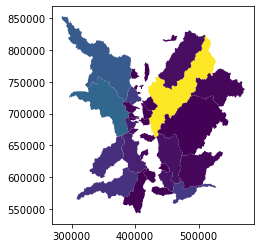

In [141]:
gdf = gpd.GeoDataFrame(merge, geometry='geometry_x')
gdf.plot(column='HI_y')

In [17]:
cvs = datashader.Canvas(plot_width=100,plot_height=100)
grid = cvs.points(recients, x="x", y="y")

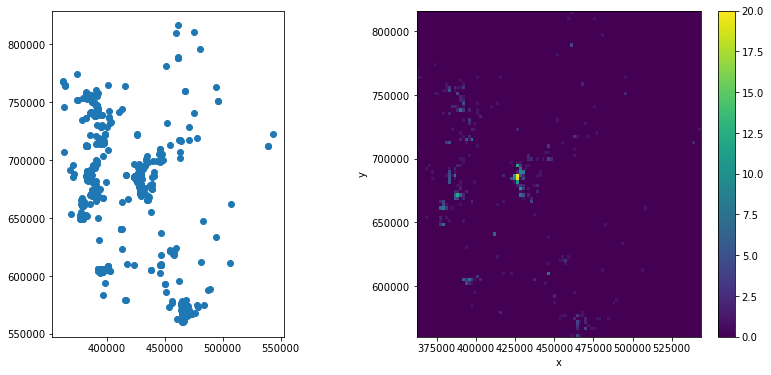

In [13]:
f, axs = plt.subplots(1, 2, figsize=(14, 6))
recients.plot(ax=axs[0])
grid.plot(ax=axs[1]);

In [69]:
grid.rio.to_raster('grid.tif', crs='32618')

In [2]:
chi=gpd.read_file('chi.shp')

In [8]:
chi.head(2)

,latitude,longitude,basin_key,chi,drainage_a,elevation,flow_dista,source_key,geometry
0,9.277987,-74.457115,50,0.018329,6.978600e+08,16.017,484.24,714,POINT (559625.232 1025631.377)
1,4.917042,-74.734398,55,3.461400,3.507400e+10,208.110,905730.00,753,POINT (529446.926 543500.064)


<AxesSubplot:>

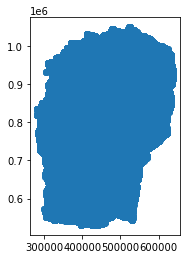

In [15]:
chi.plot()

In [3]:
coordenadas = np.column_stack((chi.geometry.x, chi.geometry.y))
coordenadas[0:10,:]

array([[ 559625.23232895, 1025631.37703531],
       [ 529446.92616167,  543500.06444067],
       [ 529506.96021601,  543560.0636822 ],
       [ 529566.99417268,  543620.06408399],
       [ 529506.91242751,  543680.06413563],
       [ 529566.94628163,  543740.0645446 ],
       [ 529626.98003893,  543800.06390308],
       [ 529566.89838048,  543860.06390371],
       [ 529626.93205997,  543920.00136731],
       [ 529566.8504935 ,  543980.00136464]])

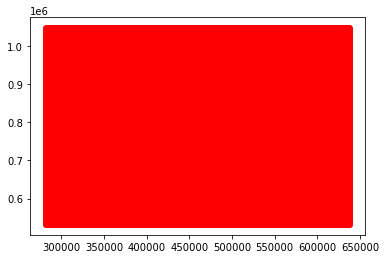

In [4]:
xmin, ymin, xmax, ymax = chi.total_bounds
x, y = np.meshgrid(np.linspace(xmin, xmax, num=1000), np.linspace(ymin,ymax, num=1000))
plt.plot(x,y,".", color="red");

In [5]:
grid_df = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x=x.flatten(), y=y.flatten()))

<AxesSubplot:>

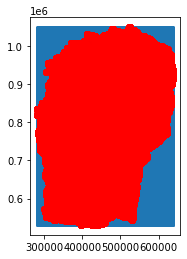

In [6]:
ax = grid_df.plot(markersize=1)
chi.plot(ax=ax, color='red')

In [9]:
model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(coordenadas, chi.chi)

KNeighborsRegressor(weights='distance')

In [10]:
grid = np.column_stack((x.flatten(), y.flatten()))
predictions = model.predict(grid)

<AxesSubplot:>

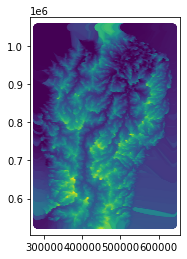

In [11]:
grid_df.plot(predictions)